# Frequency integrated spherical tensors

In [72]:
!pwd

/Users/kulkarniad/rh_aniso/rhsc3d/small


In [71]:
# I ran rh using commit 2c7abc7cd6910925

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [37]:
sr_lambda  = np.loadtxt('wl.csv')

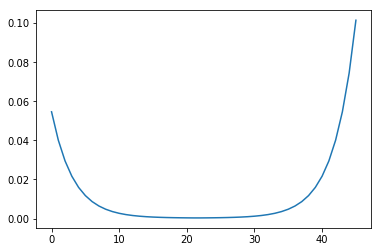

In [3]:
plt.plot(np.diff(sr_lambda[11:58]))

## Data for small cross section of MURaM cube (zooming in on a granule)

In [40]:
J00 = np.loadtxt('J.txt').reshape(64,50,50)
J20 = np.loadtxt('J20.txt').reshape(64,50,50)
reJ21 = np.loadtxt('reJ21.txt').reshape(64,50,50)
imJ21 = np.loadtxt('imJ21.txt').reshape(64,50,50)
reJ22 = np.loadtxt('reJ22.txt').reshape(64,50,50)
imJ22 = np.loadtxt('imJ22.txt').reshape(64,50,50)

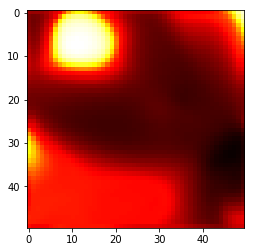

In [41]:
plt.imshow(J00[26,:,:],cmap='hot')

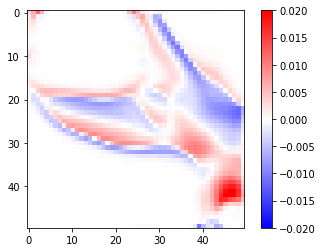

In [42]:
plt.imshow(imJ21[30,:,:]/J00[30,:,:],cmap='bwr')
plt.clim(-0.02,0.02)
plt.colorbar()

## Zero out perpendicular velcoties in MURaM cube and see how the components of spherical tensors change

In [43]:
v0_J00 = np.loadtxt('../vperp_0_small/J.txt').reshape(64,50,50)
v0_J20 = np.loadtxt('../vperp_0_small/J20.txt').reshape(64,50,50)
v0_reJ21 = np.loadtxt('../vperp_0_small/reJ21.txt').reshape(64,50,50)
v0_imJ21 = np.loadtxt('../vperp_0_small/imJ21.txt').reshape(64,50,50)
v0_reJ22 = np.loadtxt('../vperp_0_small/reJ22.txt').reshape(64,50,50)
v0_imJ22 = np.loadtxt('../vperp_0_small/imJ22.txt').reshape(64,50,50)

percent difference = 0.01538


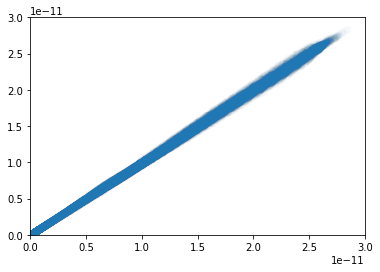

In [48]:
plt.scatter(v0_J00.flatten(),J00.flatten(),alpha=0.01)
plt.xlim(0,3e-11)
plt.ylim(0,3e-11)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))
plt.show()

rms difference ~ 0.0301


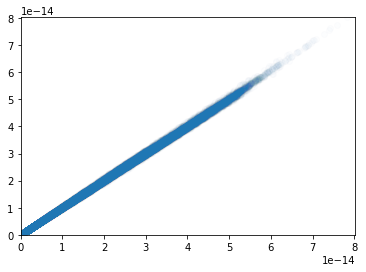

In [60]:
plt.scatter(v0_J20.flatten(),J20.flatten(),alpha=0.01)
up = np.max(J20)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std(v0_J20 - J20)/np.mean(J20)
print('rms difference ~ '+ str(round(rms,5)))

plt.show()

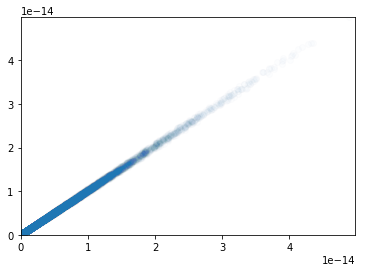

In [20]:
plt.scatter(v0_reJ21.flatten(),reJ21.flatten(),alpha=0.01)
up = np.max(reJ21)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

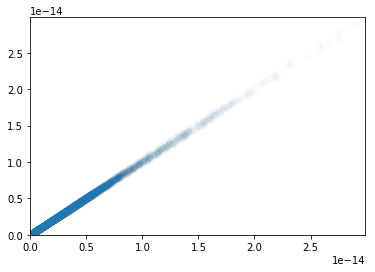

In [21]:
plt.scatter(v0_reJ22.flatten(),reJ22.flatten(),alpha=0.01)
up = np.max(reJ22)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

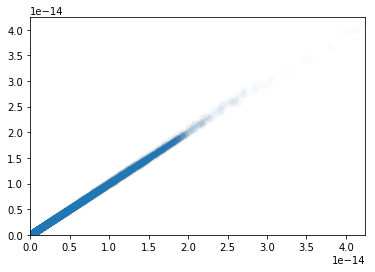

In [22]:
plt.scatter(v0_imJ21.flatten(),imJ21.flatten(),alpha=0.01)
up = np.max(imJ21)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

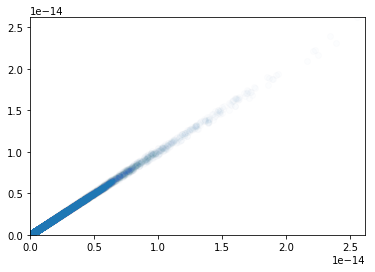

In [23]:
plt.scatter(v0_imJ22.flatten(),imJ22.flatten(),alpha=0.01)
up = np.max(imJ22)
plt.xlim(0,up)
plt.ylim(0,up)
rms = np.std((J00 - v0_J00)/J00)
print('percent difference = ' + str(round(rms,5)))

plt.show()

In [27]:
np.sqrt(np.std((v0_imJ21.flatten() - imJ21.flatten())**2))

1.7005017934237677e-16

# A zoom in

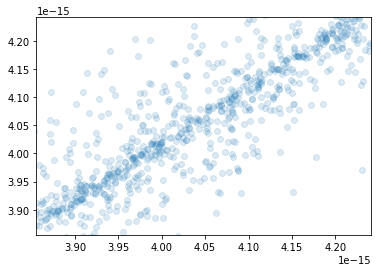

In [31]:
plt.scatter(v0_imJ21.flatten(),imJ21.flatten(),alpha=0.15)
up = np.max(imJ21)
plt.xlim(up/11,up/10)
plt.ylim(up/11,up/10)
plt.show()

# Judging the the scatter plots, zeroing the verpendicular produces essentially no change in the resulting spherical tensors

In [64]:
# function to read in RH atmosspheres read through read3datmos.pro and
# written to a fits file using mwrfits.pro
class atmos:
    def __init__(self,fname):
        
        data = fits.open(fname)
        a = data[1].data[0]
        
        self.nx = a[0]
        self.ny = a[1]
        self.nz = a[2]
        self.nhydr = a[3]
        self.bcs = a[4]
        self.dx = a[5]
        self.dy = a[6]
        self.z = a[7]
        self.t = a[8]
        self.nelec = a[9]
        self.vturb = a[10]
        self.vx = a[11]
        self.vy = a[12]
        self.vz = a[13]
        self.nh = a[14]

In [65]:
s = atmos('/Users/kulkarniad/muram/small.fits')
v0s = atmos('/Users/kulkarniad/muram/vperp_0_small.fits')



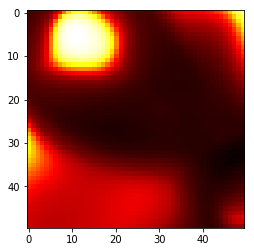

In [69]:
plt.imshow(s.t[26,:,:],cmap='hot')